In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

sns.set_color_codes()
%matplotlib inline

In [3]:
data = pd.read_csv('/kaggle/input/insurance/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Observations**
1. Charges: It looks a bit skewed towards the right side as mean (13270) is greater than median 50% (9382) and there may be many outliers at the top end of values.
2. BMI: It looks evenly distributed when you take into account Q1,Q2,Q3. There are few outliers at the top end of values,

For eg., IQR = 34.694 - 26.296 = 8.398. Max = 1.5 IQR = 1.5 8.398 = 12.597. top whisker = 34.693 + 12.597 = 47.289
Since max values (53.13) is greater than top whisker, it is an outlier. And there may be more outliers.

This will be more clear with a boxplot, which will be shown later in this document.
3.

**Distribution of ‘bmi’, ‘age’ and ‘charges’ columns**

In [12]:
import seaborn as sns

/tmp/ipykernel_32/4200618132.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'],kde=True)


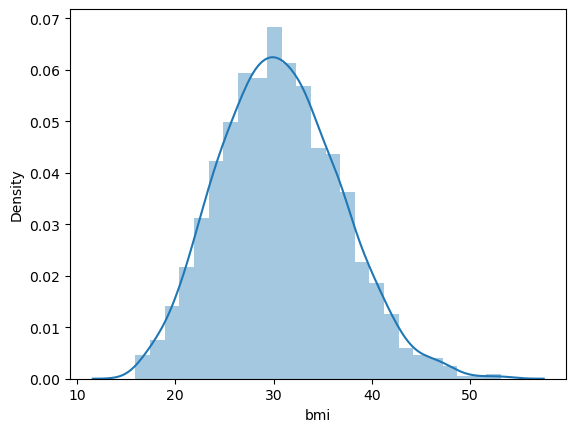

In [21]:
sns.distplot(data['bmi'],kde=True)
plt.show()

/tmp/ipykernel_32/400265597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


<function matplotlib.pyplot.show(close=None, block=None)>

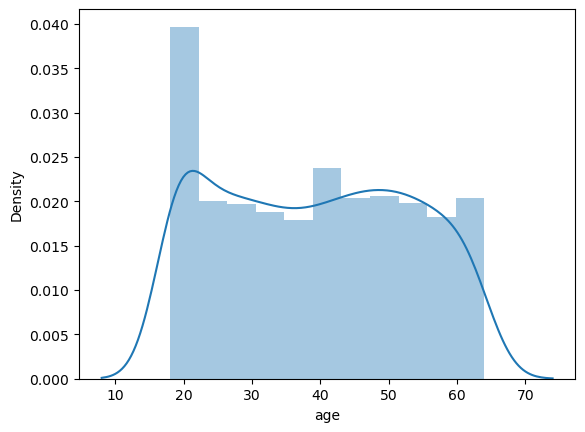

In [16]:
sns.distplot(data['age'])
plt.show

/tmp/ipykernel_32/3303687566.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


<Axes: xlabel='charges', ylabel='Density'>

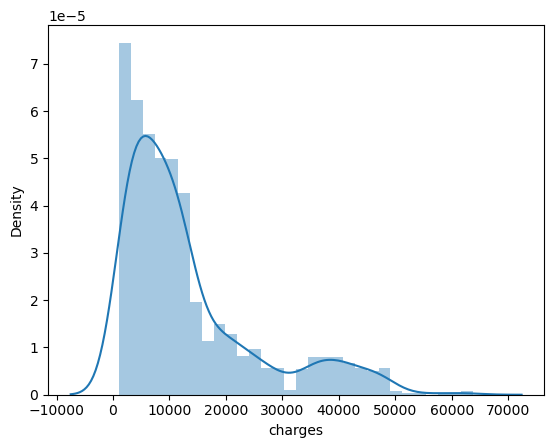

In [17]:
sns.distplot(data['charges'])

/tmp/ipykernel_32/2145879049.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bmi = sns.distplot(data['bmi'], color="red", ax=axes[0], kde=True, hist_kws={"edgecolor":"k"})
/tmp/ipykernel_32/2145879049.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  age = sns.distplot(data['age'], color='green', ax = axes[1], kde=

Text(0.5, 0, 'Charges')

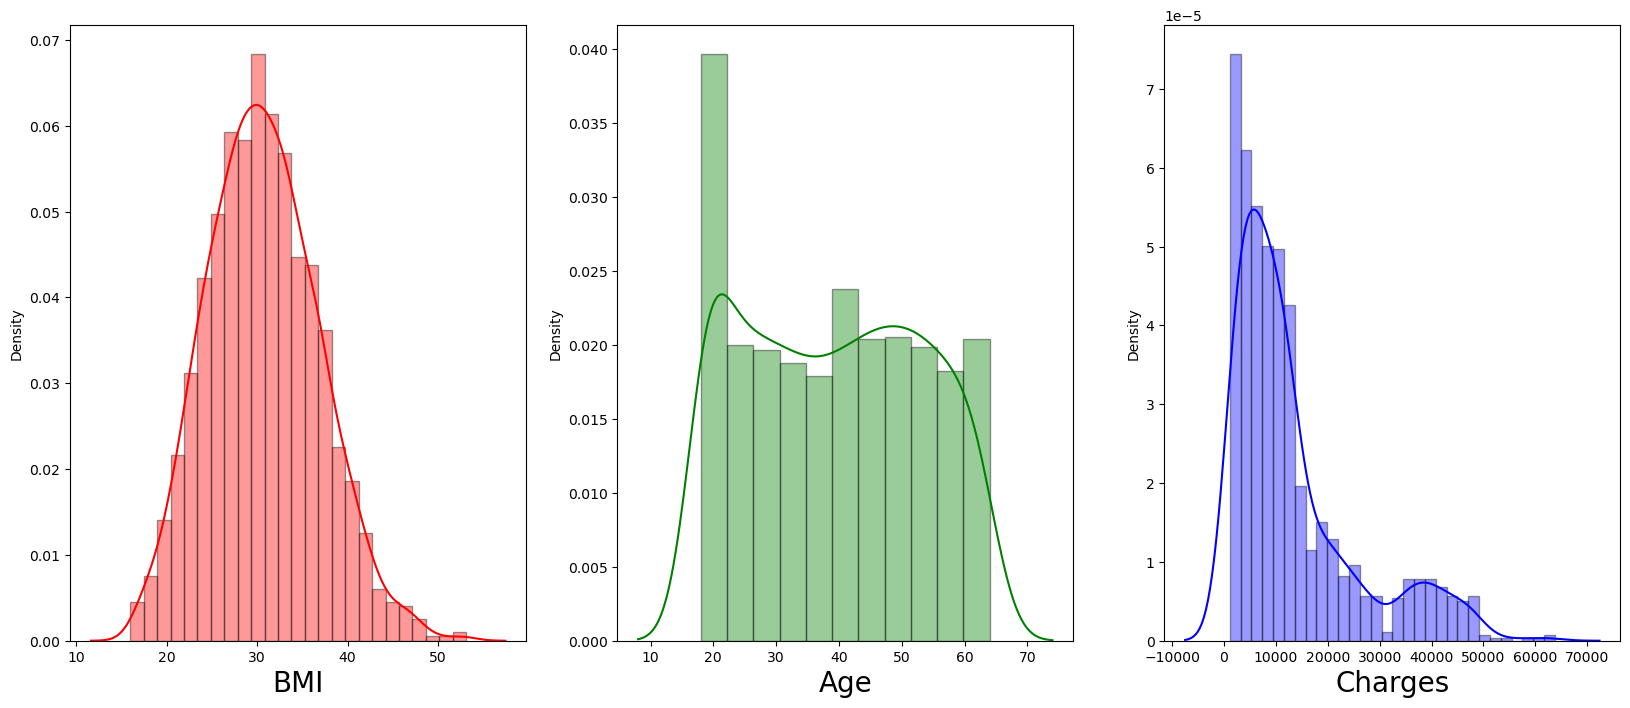

In [18]:
f, axes = plt.subplots(1, 3, figsize=(20, 8))
bmi = sns.distplot(data['bmi'], color="red", ax=axes[0], kde=True, hist_kws={"edgecolor":"k"})
bmi.set_xlabel("BMI",fontsize=20)

age = sns.distplot(data['age'], color='green', ax = axes[1], kde=True, hist_kws={"edgecolor":"k"})
age.set_xlabel("Age",fontsize=20)

charges = sns.distplot(data['charges'], color='blue', ax = axes[2], kde=True, hist_kws={"edgecolor":"k"})
charges.set_xlabel("Charges",fontsize=20)

* BMI : Normally distributed
* Age : Uniformly distributed throughout.
* Charges: Right skewed.

**Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns**

In [28]:
pd.DataFrame.from_dict(dict(
    {
        'bmi':data.bmi.skew(), 
        'age': data.age.skew(), 
        'charges': data.charges.skew()
    }), orient='index', columns=['Skewness'])

,Skewness
bmi,0.284047
age,0.055673
charges,1.515880


Text(0.5, 0, 'Charges')

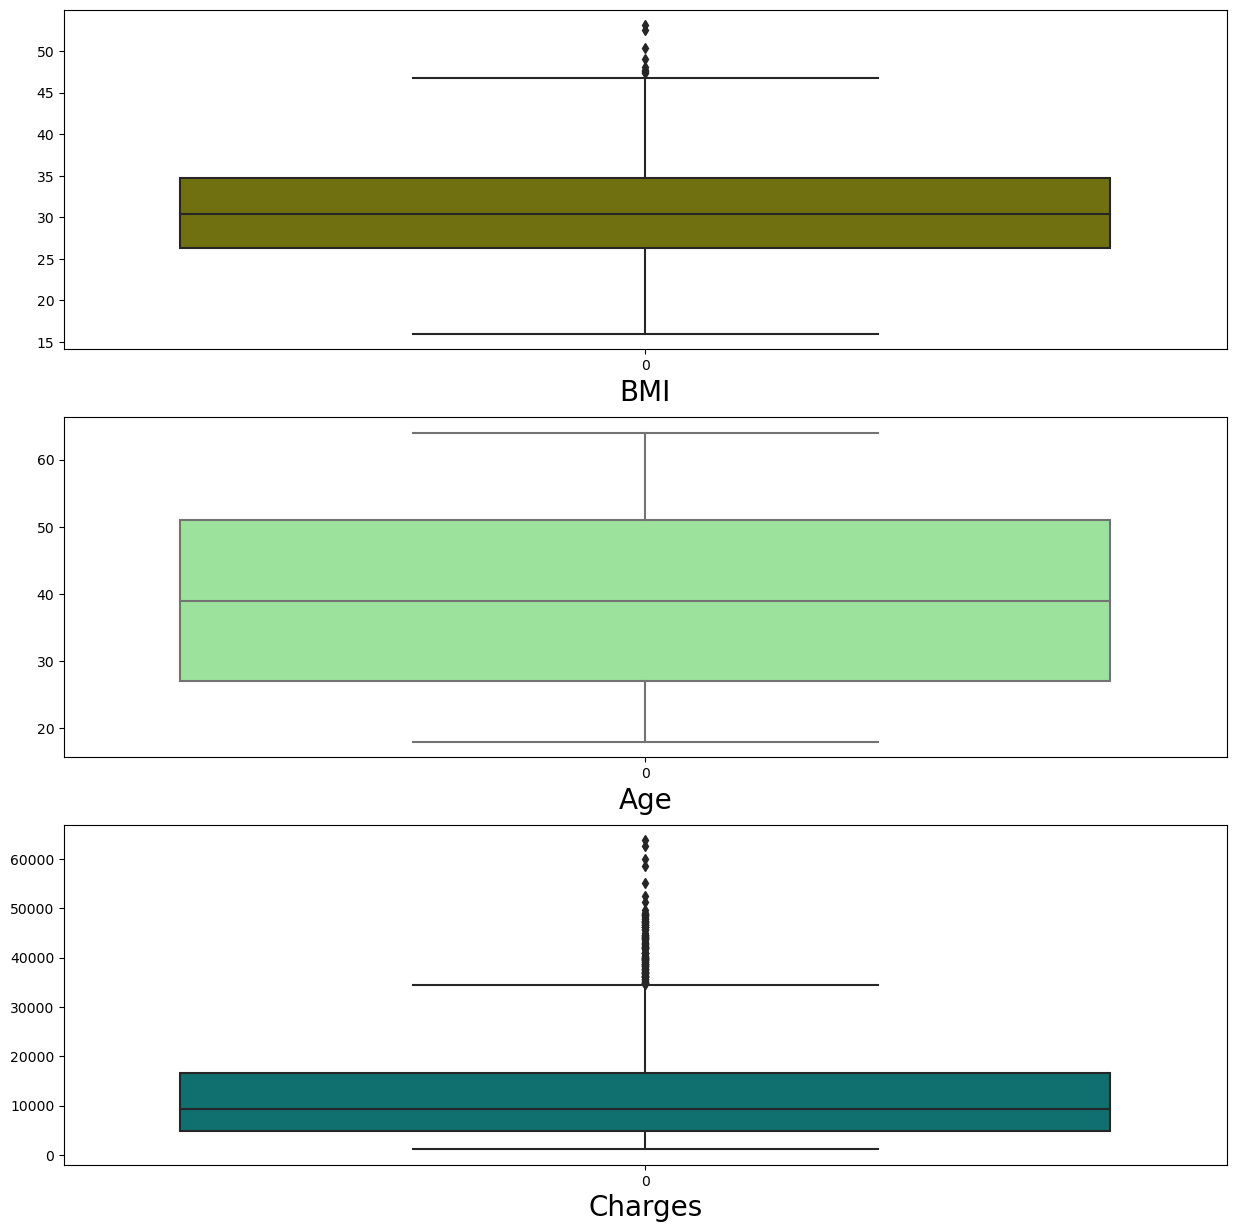

In [32]:
f, axes = plt.subplots(3, 1, figsize=(15, 15))
bmi = sns.boxplot(data['bmi'], color="olive", ax=axes[0])
bmi.set_xlabel("BMI",fontsize=20)

age = sns.boxplot(data['age'], color='lightgreen', ax=axes[1])
age.set_xlabel("Age",fontsize=20)

charges = sns.boxplot(data['charges'], color='teal', ax=axes[2])
charges.set_xlabel("Charges",fontsize=20)

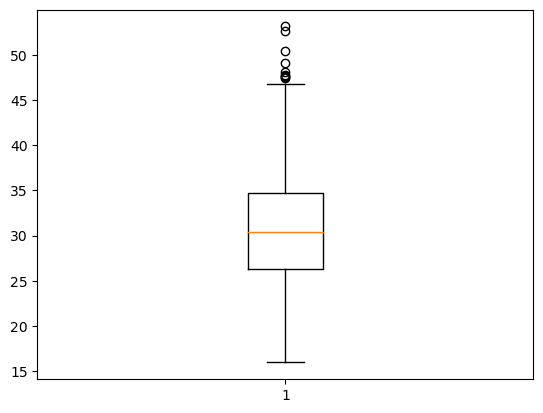

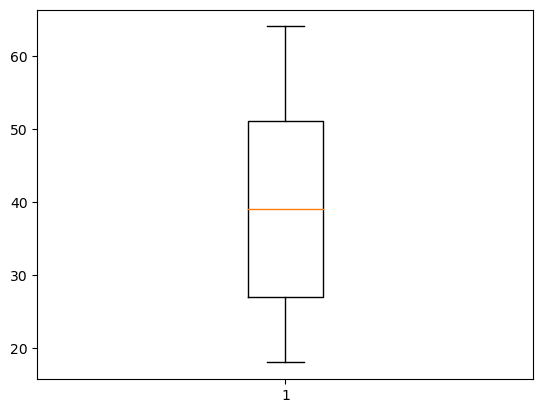

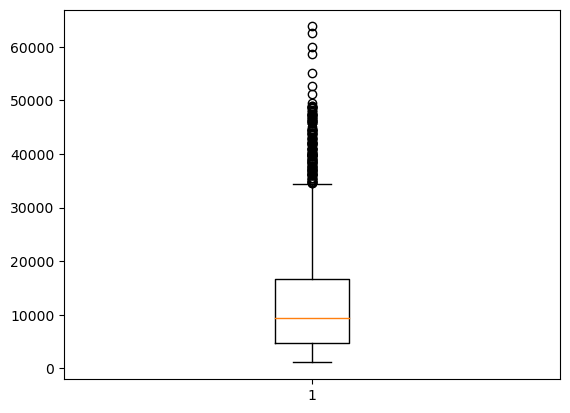

In [36]:
#f, axes = plt.subplots(3, 1, figsize=(15, 15))

bmi=plt.boxplot(data['bmi'])
plt.show()

age=plt.boxplot(data['age'])
plt.show()

charges=plt.boxplot(data['charges'])
plt.show()

**Distribution of categorical columns**

Listing Categorical Columns

* Sex
* Smoker
* Region
* Children

Text(0.5, 0, 'Children')

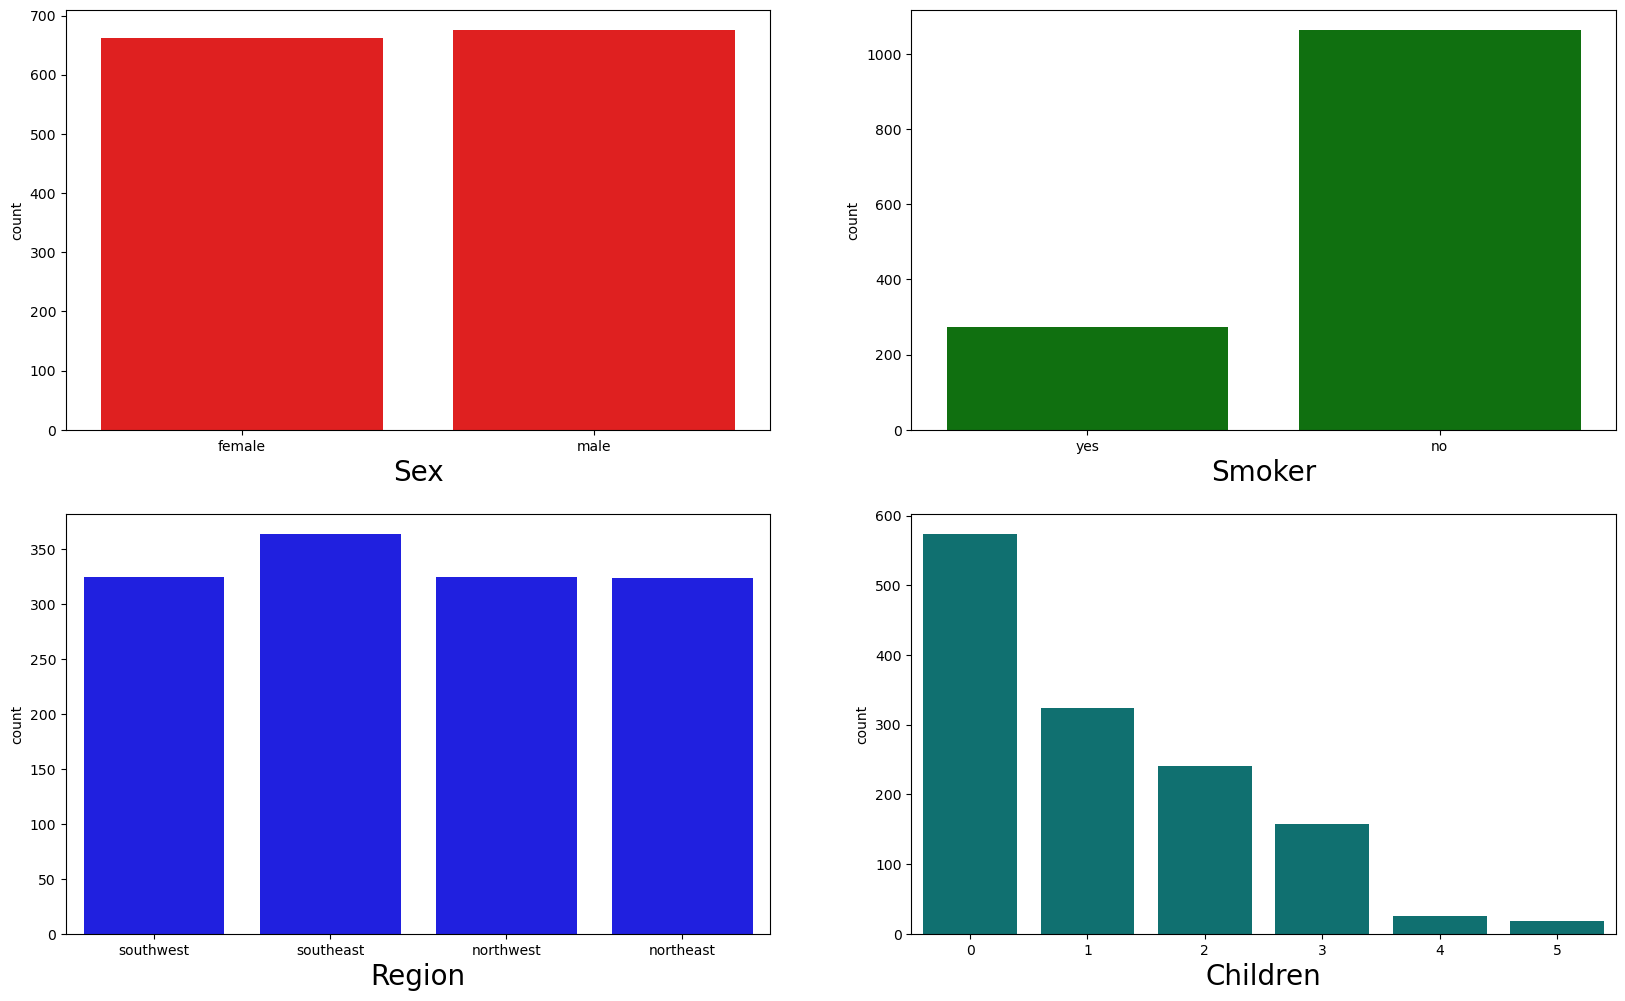

In [50]:
f, axes = plt.subplots(2, 2, figsize=(20, 12))
sex = sns.countplot(x='sex', data=data, color="red", ax=axes[0,0])
sex.set_xlabel("Sex",fontsize=20)

smoker = sns.countplot(x='smoker',data=data, color='green', ax = axes[0,1])
smoker.set_xlabel("Smoker",fontsize=20)

region = sns.countplot(x='region', data=data, color='blue', ax = axes[1,0])
region.set_xlabel("Region",fontsize=20)

children = sns.countplot(x='children', data=data, color='teal', ax = axes[1,1])
children.set_xlabel("Children",fontsize=20)

* Sex : Insurances are evenly matched between Male and Female
* Smoker : There are lot of Non-Smokers compared to Smokers
* Region : Insurance is distributed evenly across all regions
* Children : Few insurance clients have 4 or children, most have no child and many have 1 or 2 or 3 
children

<Axes: xlabel='region', ylabel='charges'>

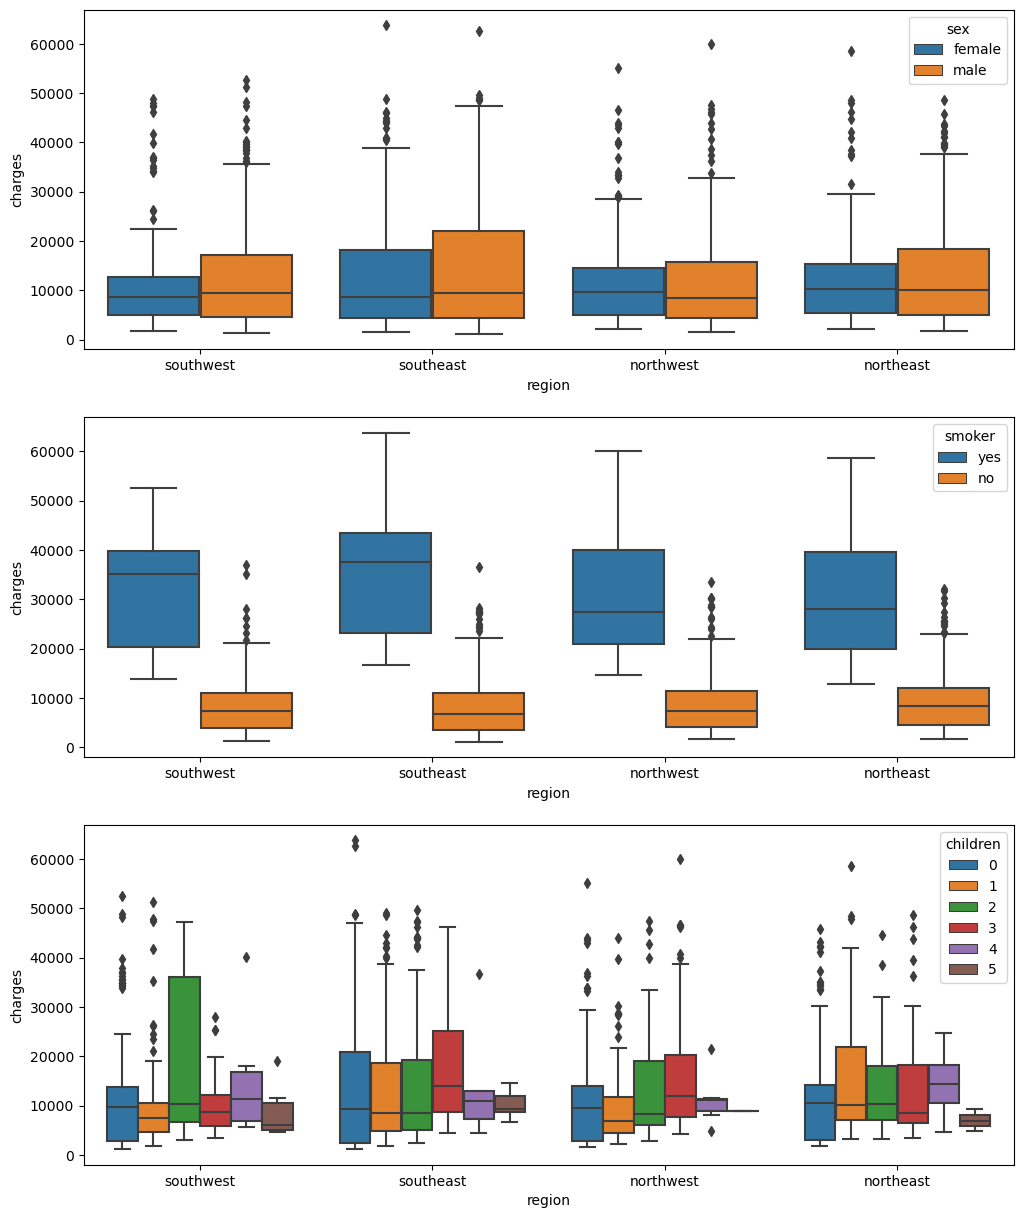

In [52]:
f, axes = plt.subplots(3, 1, figsize=(12, 15))
sns.boxplot(x='region', y='charges', hue='sex', data=data, ax=axes[0])

sns.boxplot(x='region', y='charges', hue='smoker', data=data, ax = axes[1])

sns.boxplot(x='region', y='charges', hue='children', data=data, ax = axes[2])

In [41]:
data_copy = data.copy()
data_copy.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


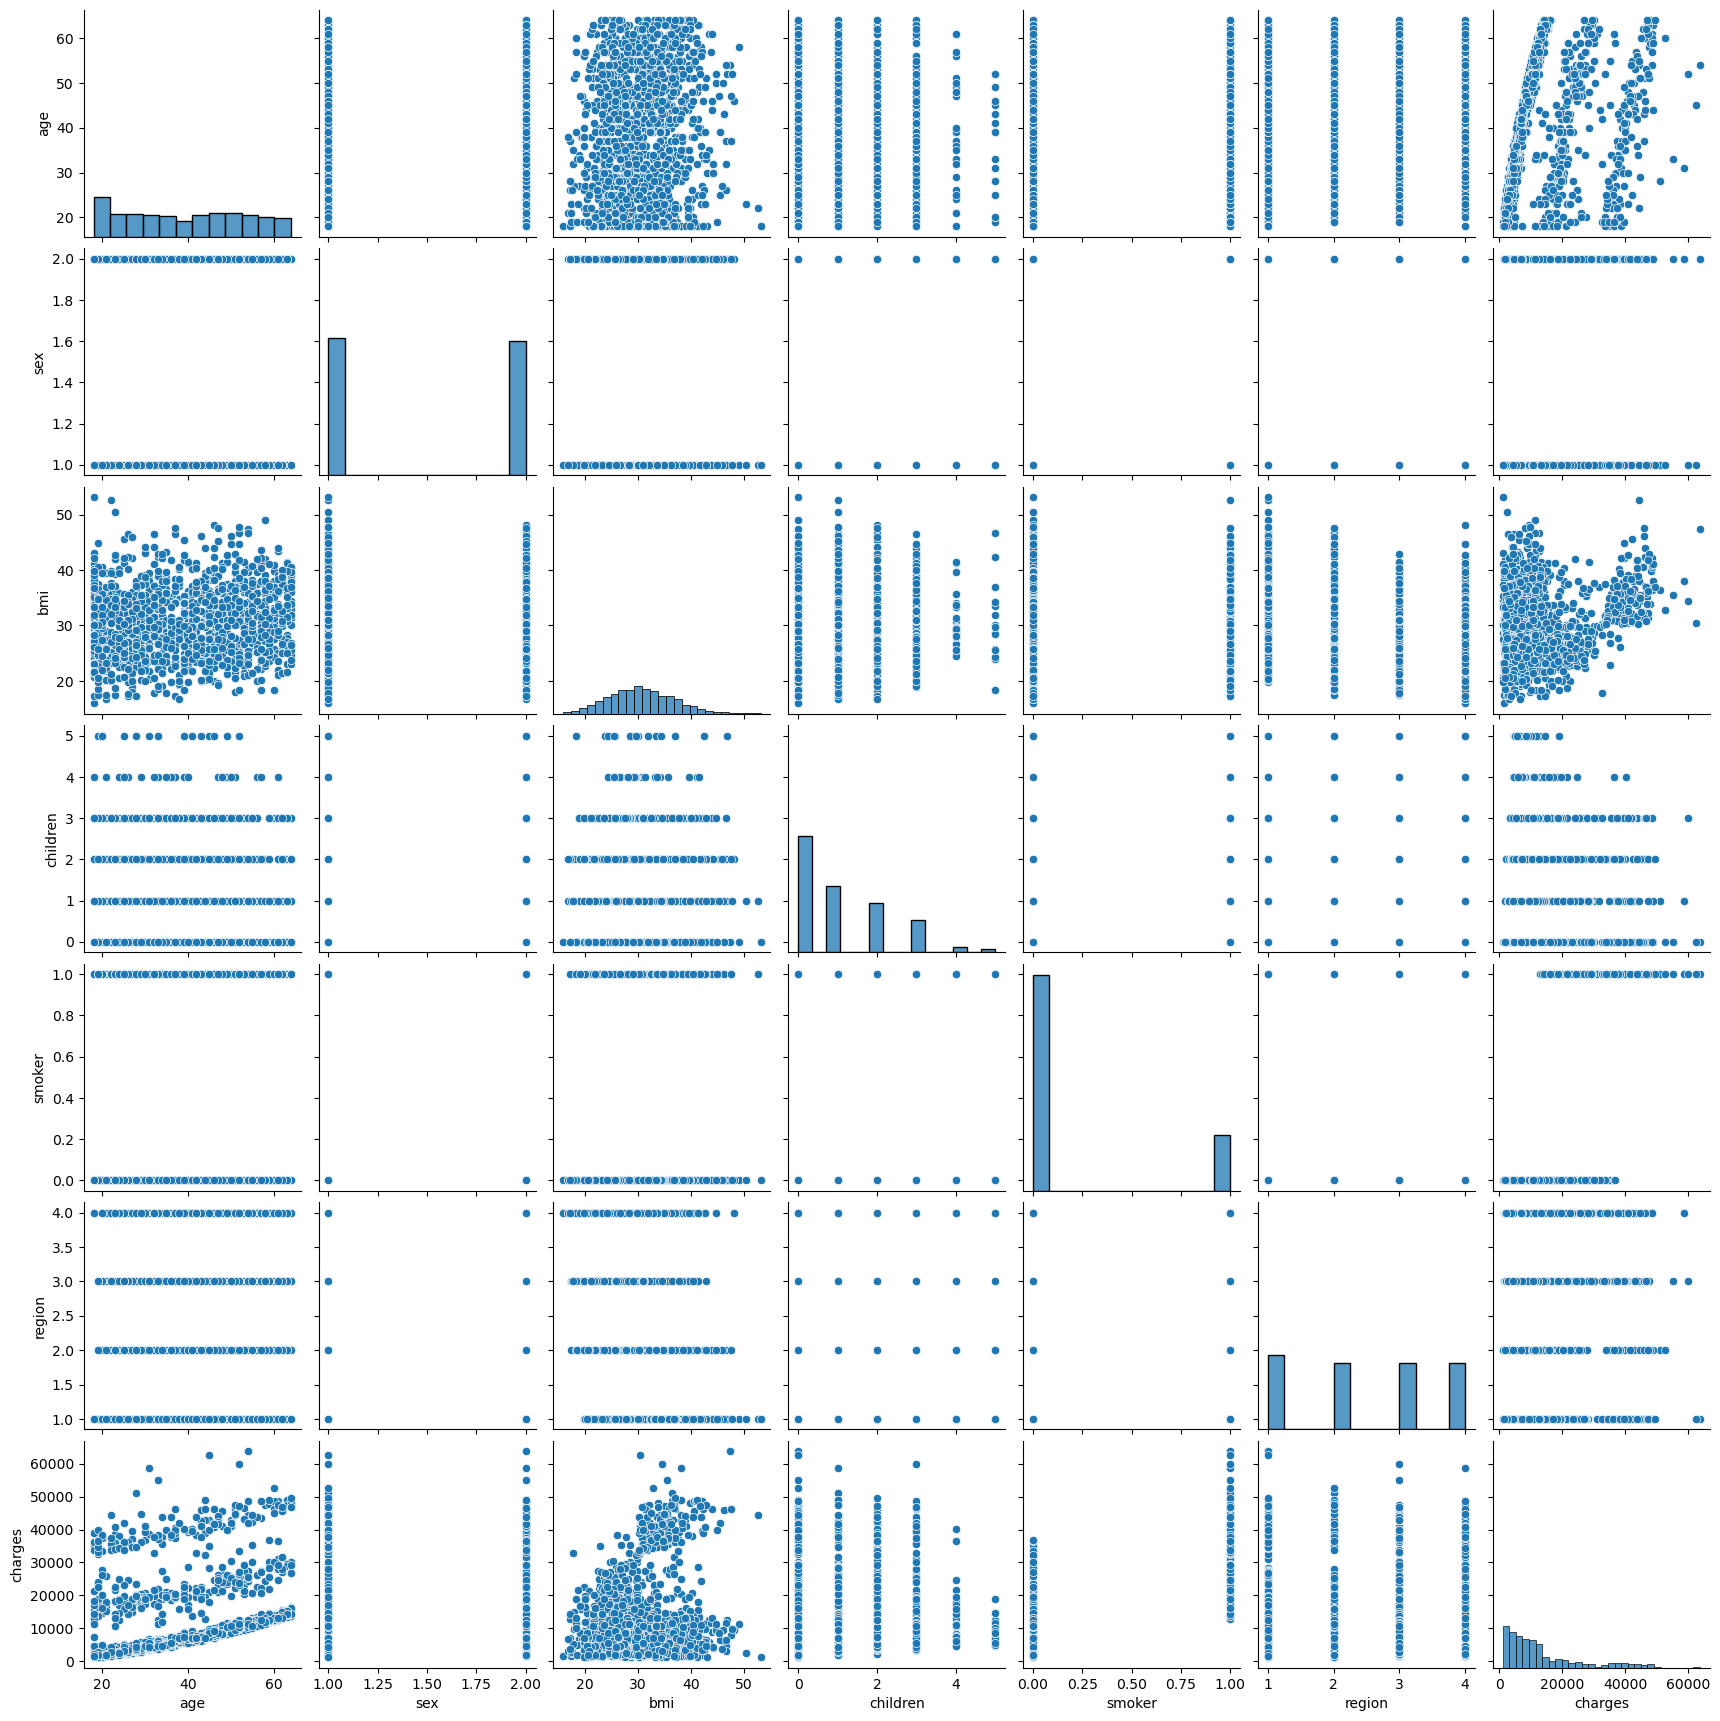

In [42]:
# Replace categorical columns with numerical equivalents

data_copy['sex'] = data_copy['sex'].replace({'male': 1, 'female': 2})
data_copy['smoker'] = data_copy['smoker'].replace({'yes': 1, 'no': 0})
data_copy['region'] = data_copy['region'].replace({'southeast': 1, 'southwest': 2, 'northwest': 3, 'northeast': 4})

# Pair plot with all the columns
sns.pairplot(data_copy)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


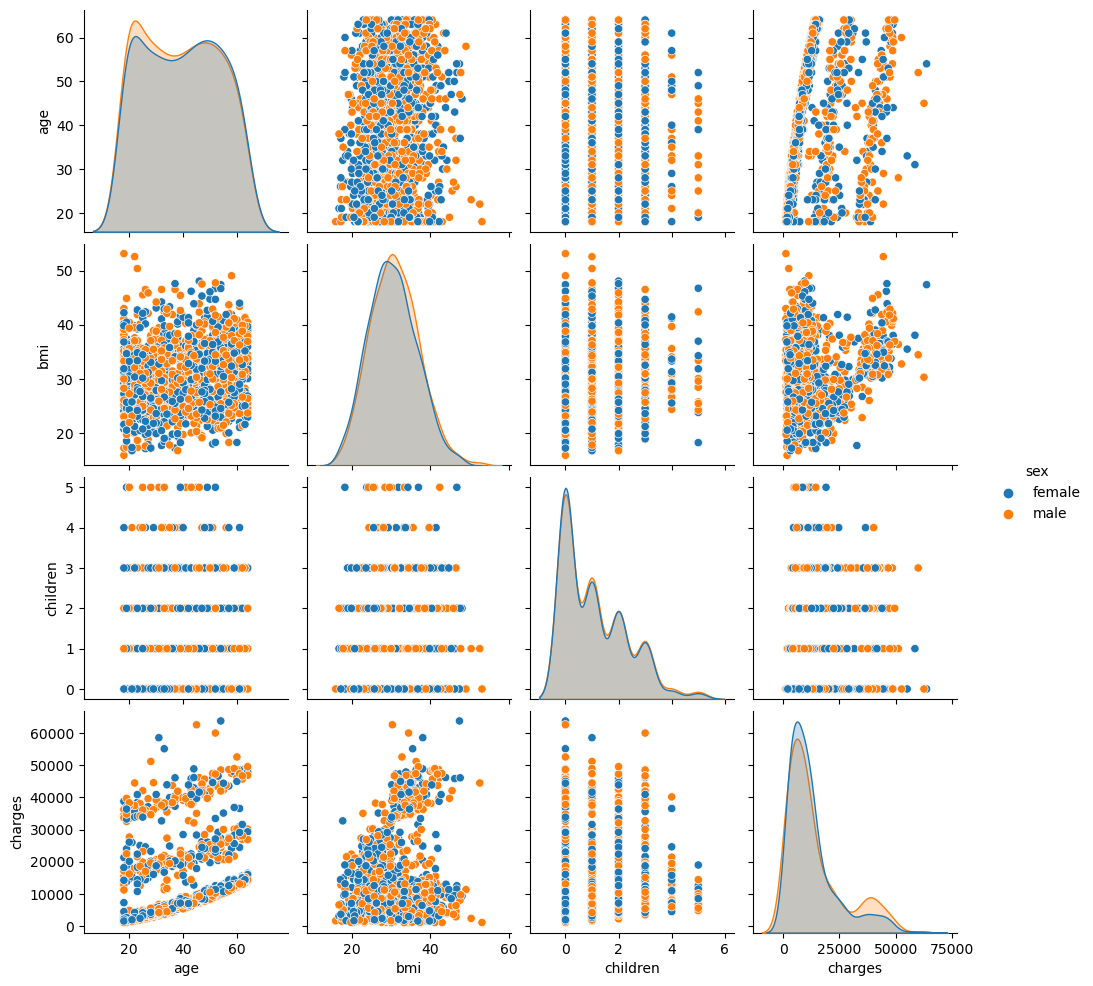

In [44]:
sns.pairplot(data, hue='sex')


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


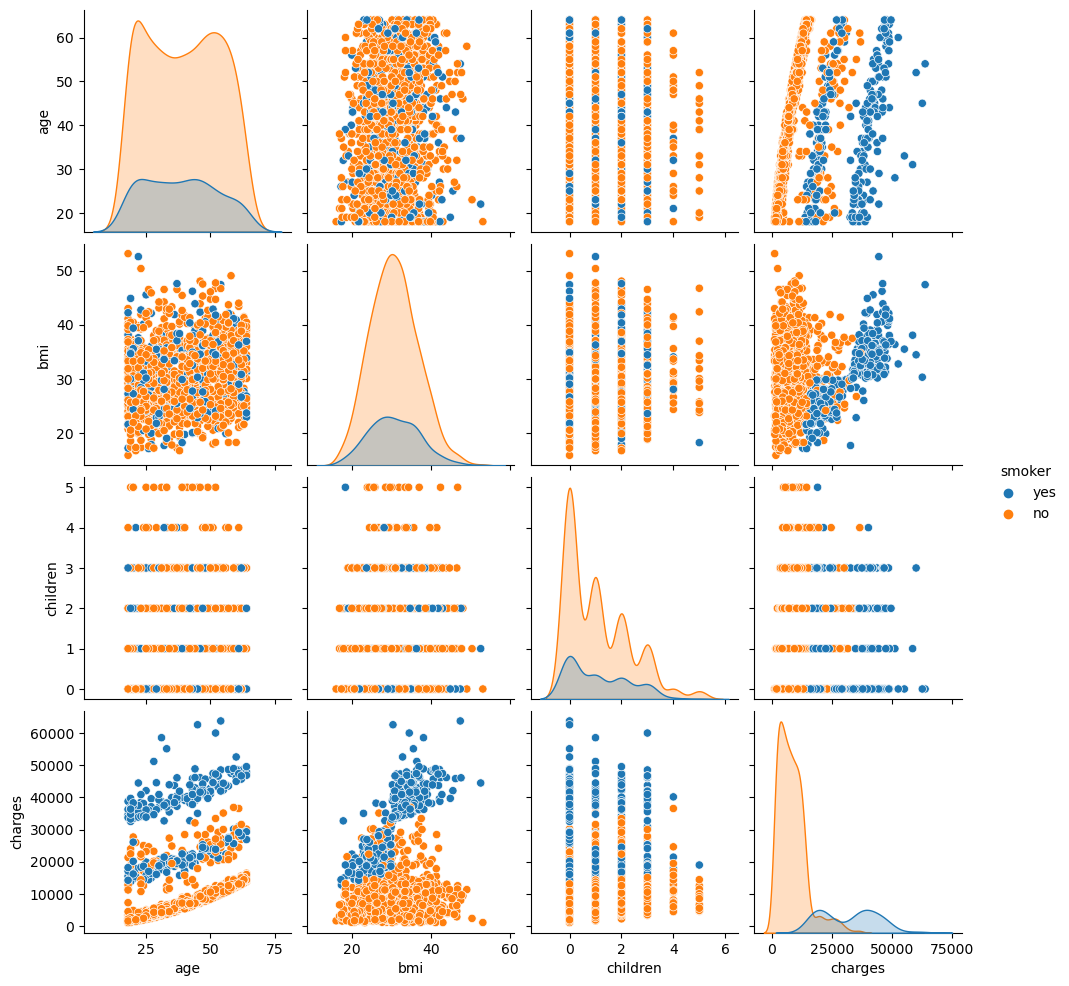

In [45]:
sns.pairplot(data, hue='smoker')


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


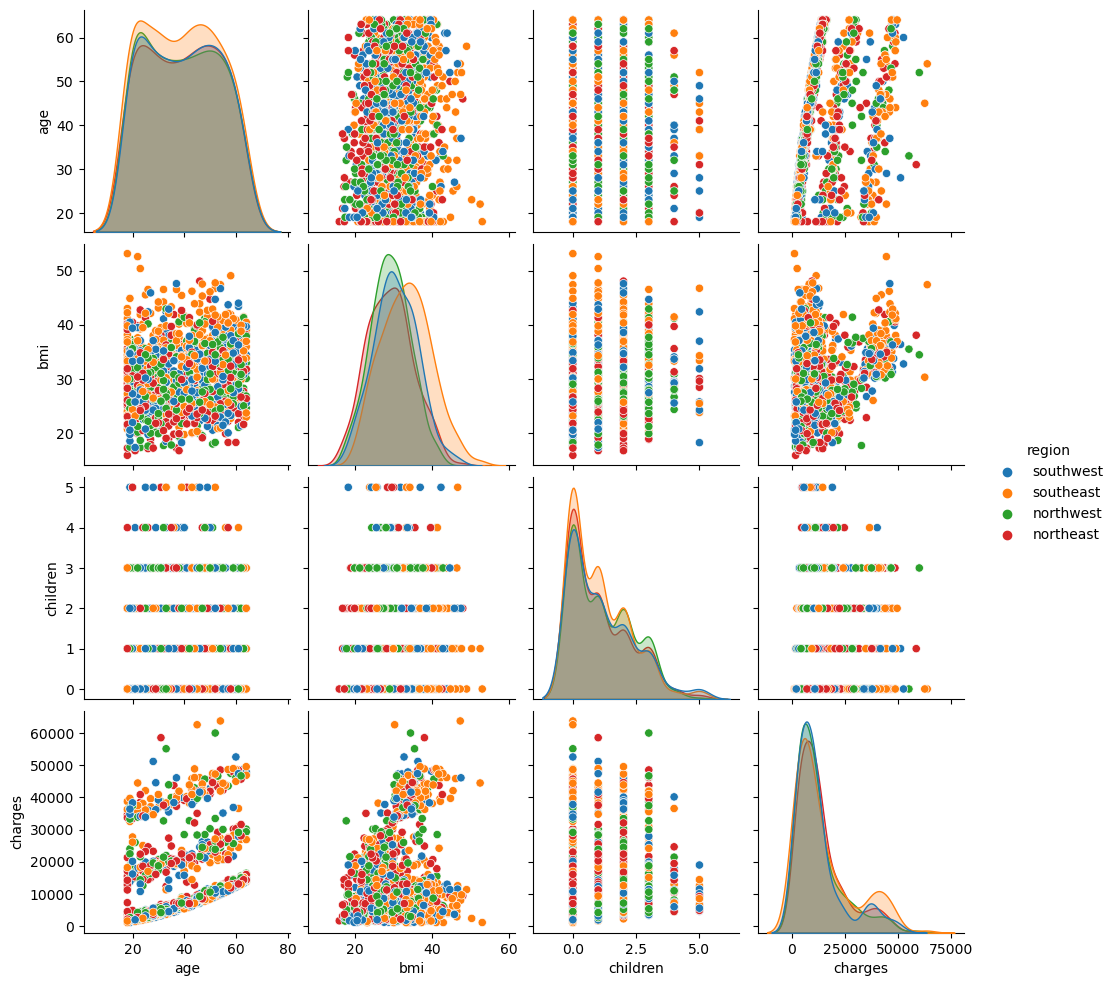

In [46]:
sns.pairplot(data, hue='region')

In [47]:
data_copy.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.012816,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


**Obervations based on pair plot and correlation table**
* There is a high positive correlation between smokers and charges
* Non-smokers have less charges whereas Smokers are charged more
* There is a slight postive correlation between Age and Charges, which means older people are charged more.

**a. Do charges of people who smoke differ significantly from the people who don't?**

In [53]:
pd.DataFrame.from_dict(dict(
    {
        'charges_smokers':data[data.smoker == 'yes'].charges.skew(),    
        'charges_non-smokers': data[data.smoker == 'no'].charges.skew(),
    }), orient='index', columns=['Skewness'])

,Skewness
charges_smokers,0.128217
charges_non-smokers,1.538120


The log1p() function is a powerful tool for transforming skewed data. It can be used to make the data more normally distributed, which can make it easier to fit a model to the data. It can also be used to improve the performance of machine learning algorithms.

In [54]:
data.charges  = np.log1p(data.charges)

In [55]:
pd.DataFrame.from_dict(dict(
    {
        'charges_smokers':data[data.smoker == 'yes'].charges.skew(),    
        'charges_non-smokers': data[data.smoker == 'no'].charges.skew(),
    }), orient='index', columns=['Skewness'])

,Skewness
charges_smokers,-0.299684
charges_non-smokers,-0.312578


<Axes: xlabel='smoker', ylabel='charges'>

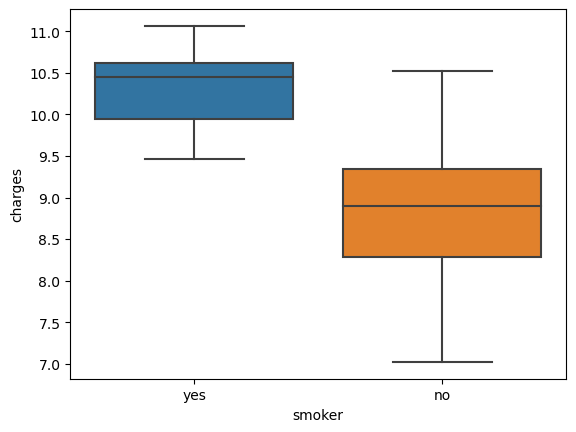

In [57]:
sns.boxplot(x='smoker', y='charges', data=data)

**State null hypothesis**
H0 : Charges of smokers are same as Charges of Non-smokers

**State alternate hypothesis**
H1 : Charges of non-smokers are significantly different from Charges of smokers

In [61]:
import scipy.stats as stats

#Split the charges column into two parts between smokers and non-smokers

X = np.array(data[data.smoker == 'yes'].charges) #Smokers
Y = np.array(data[data.smoker == 'no'].charges) #Non-Smokers

#executing the independent t-test to run tests on single variable
t_stat, p_value = stats.ttest_ind(X,Y)

# Setting our significance level at 5%
if p_value < 0.05:  
    printmd(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis\n. Hence **charges of smokers differ significantly from non-smokers**', color='blue')
else:
    printmd(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis\n. Hence **charges of smokers are same as charges of non-smokers**', color='blue')

<span style='color:blue'>As the p_value **(5.97782876368448e-172) < 0.05**, we reject the Null Hypothesis
. Hence **charges of smokers differ significantly from non-smokers**</span>

**Does bmi of males differ significantly from that of females?**

<Axes: xlabel='sex', ylabel='bmi'>

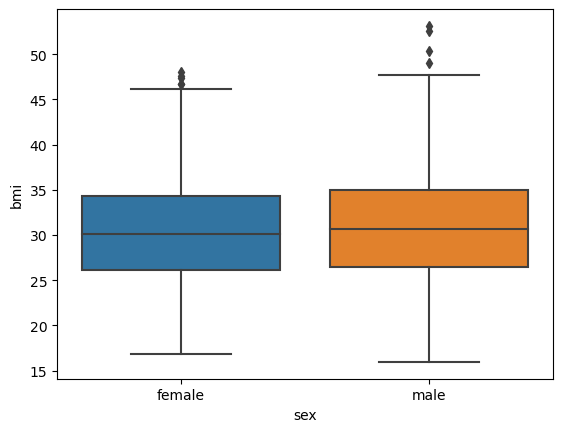

In [62]:
sns.boxplot(x='sex', y='bmi', data=data)


**State null hypothesis**
H0 : BMI of Males are similar to that of Females

**State alternate hypothesis**
H1 : BMI of Males are significantly different from that of Females

In [63]:
#Split the bmi column into two parts between male and female

X = np.array(data[data.sex == 'male'].bmi) #Males
Y = np.array(data[data.sex == 'female'].bmi) #Females

#executing the independent t-test to run tests on single variable
t_stat, p_value = stats.ttest_ind(X,Y)

# Setting our significance level at 5%
if p_value < 0.05:  
    printmd(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis. Hence **BMI of Males are significantly different from that of Females**', color='blue')
else:
    printmd(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis. Hence **BMI of Males are similar to that of Females**', color='blue')

<span style='color:blue'>As the p_value **(0.08997637178984932) > 0.05**, we fail to reject Null Hypothesis. Hence **BMI of Males are similar to that of Females**</span>

**Is the proportion of smokers significantly different in different genders?**

<Axes: xlabel='smoker', ylabel='count'>

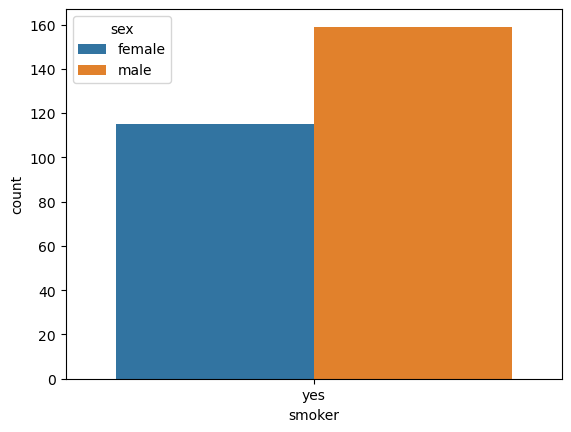

In [64]:
sns.countplot(x='smoker', hue='sex', data=data[data.smoker == 'yes'])


**State null hypothesis**
H0 : Proportion of smokers are similar in both the Genders

**State alternate hypothesis**
H1 : Proportion of smokers are significantly different in different Genders

In [65]:
#Since Smokers and Sex are categorical columns, choosing Chi-Square test for testing

contigencytable = pd.crosstab(data['sex'],data['smoker'])
chi_sq_Stat, p_value, deg_freedom, exp_freq =  stats.chi2_contingency(contigencytable)

# Setting our significance level at 5%
if p_value < 0.05:  
    printmd(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis. Hence **Proportion of smokers are significantly different in different Genders**', color='blue')
else:
    printmd(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis. Hence **Proportion of smokers are similar in both the Genders**', color='blue')

<span style='color:blue'>As the p_value **(0.006548143503580696) < 0.05**, we reject the Null Hypothesis. Hence **Proportion of smokers are significantly different in different Genders**</span>

**Is the distribution of bmi across women with no children, one child and two children, the same ?**

<Axes: xlabel='children', ylabel='bmi'>

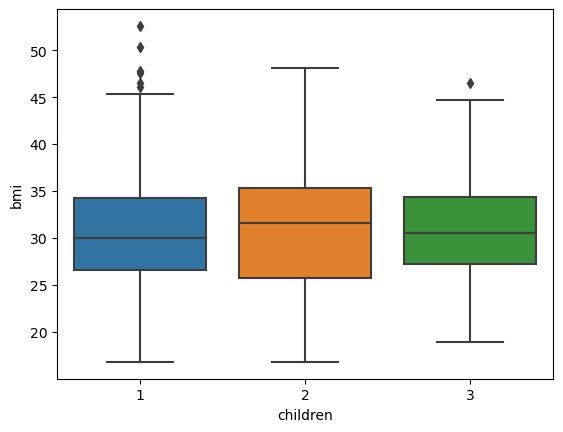

In [66]:
sns.boxplot(x='children', y='bmi', data=data[(data.children>0) & (data.children<4)])


**State null hypothesis**
H0 : BMI is uniform across women with different number of children

**State alternate hypothesis**
H1 : BMI is different across women with different number of children

In [69]:
#get the female data 
female_data = data[data['sex'] == 'female']
no_children_bmi = female_data[female_data['children'] == 0].bmi
one_child_bmi = female_data[female_data['children'] == 1].bmi
two_children_bmi = female_data[female_data['children'] == 2].bmi

#Since there are multiple samples and we need to check the variances of multiple samples, choosing ANOVA testing for this

f_stat, p_value = stats.f_oneway(no_children_bmi,one_child_bmi ,two_children_bmi )


# Setting our significance level at 5%
if p_value < 0.05:  
    printmd(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis. Hence **BMI is different across women with different number of children**', color='blue')
else:
    printmd(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis. Hence **BMI is uniform across women with different number of children**', color='blue')

<span style='color:blue'>As the p_value **(0.7158579926754841) > 0.05**, we fail to reject Null Hypothesis. Hence **BMI is uniform across women with different number of children**</span>